In [1]:
# ObaidUrRehman

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib.pyplot import pie, axis, show

In [4]:
hfd = pd.read_csv('hospitaldata.csv',thousands=',')
hfd.head()

,Date,id,Time,Age,Sex,Consulting..Doctor,Specialty,Procedure,Total..Charges,Amount..Received.,Amount..Balance,Amount.Received.By,Amount.in.Hospital,Receptionist..Name,Next.Apt
0,"Sunday, January 01, 2017",101,11:00AM,40,F,Dr Kinza Alam,Gynae,C Section,30000,30000.0,-,Mrs Shamsa,NaN,Hamza,NaN
1,"Monday, January 02, 2017",150,10:45AM,26,M,Nursing Staff,NaN,Dressing,1500,1500.0,-,Dr Saniya,NaN,Haris,NaN
2,"Monday, January 02, 2017",58,12:38PM,30,F,Dr Riffat Naheed,Psychotherapist,Consultation,1000,1000.0,-,Mrs Shamsa,300.0,Fiza,NaN
3,"Monday, January 02, 2017",75,1:00PM,40,M,Dr Riffat Naheed,Psychotherapist,Consultation,1500,1500.0,-,Mrs Shamsa,450.0,Zaheer,NaN
4,"Monday, January 02, 2017",97,2:45PM,27,M,Dr Riffat Naheed,Psychotherapist,Consultation,2000,2000.0,-,Mrs Shamsa,600.0,Haris,NaN


# Q1. Remove the dots in the names.

In [6]:
hfd.columns = [col.replace('.','') for col in hfd.columns]
hfd.head()

,Date,id,Time,Age,Sex,ConsultingDoctor,Specialty,Procedure,TotalCharges,AmountReceived,AmountBalance,AmountReceivedBy,AmountinHospital,ReceptionistName,NextApt
0,"Sunday, January 01, 2017",101,11:00AM,40,F,Dr Kinza Alam,Gynae,C Section,30000,30000.0,-,Mrs Shamsa,NaN,Hamza,NaN
1,"Monday, January 02, 2017",150,10:45AM,26,M,Nursing Staff,NaN,Dressing,1500,1500.0,-,Dr Saniya,NaN,Haris,NaN
2,"Monday, January 02, 2017",58,12:38PM,30,F,Dr Riffat Naheed,Psychotherapist,Consultation,1000,1000.0,-,Mrs Shamsa,300.0,Fiza,NaN
3,"Monday, January 02, 2017",75,1:00PM,40,M,Dr Riffat Naheed,Psychotherapist,Consultation,1500,1500.0,-,Mrs Shamsa,450.0,Zaheer,NaN
4,"Monday, January 02, 2017",97,2:45PM,27,M,Dr Riffat Naheed,Psychotherapist,Consultation,2000,2000.0,-,Mrs Shamsa,600.0,Haris,NaN


# Q2. Which day of the week is expected to have most visits?

In [7]:
#Checking nan in dataset

sum(hfd['Date'].isnull())


0

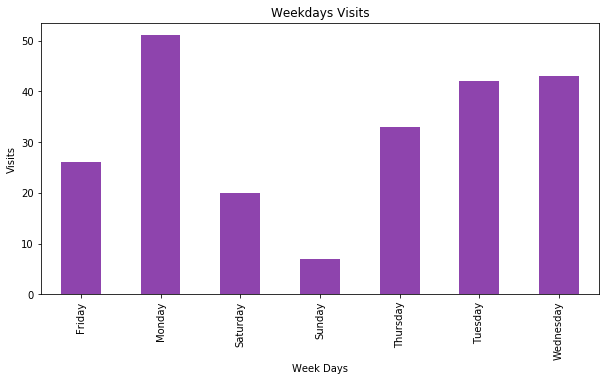

In [8]:
# So there are 0 Null values in Date column

weekday = pd.to_datetime(hfd['Date'])
hfd['WeekDay'] = weekday.dt.weekday_name  #Monday=0, Sunday=6
# grouping by weekday
DayData = hfd.groupby('WeekDay').WeekDay.count()
g1 = DayData.plot(kind='bar',figsize=(10, 5),color = '#8E44AD',title="Weekdays Visits") 
g1.set_xlabel('Week Days')
g1.set_ylabel('Visits')

#As we can see from plot, Monday has the most visits

# Q3. What is the average age of patients?

In [9]:
# First checking if there are nan values in age column
sum(hfd['Age'].isnull())

19

In [10]:
# There are 19 Nan values in Age column

#Lets check if there are garbage valus in Age column

hfd.Age.unique()

array(['40', '26', '30', '27', '43', '28', '2', '32', '76', '75', '36',
       '42', '23', '48', '25', '50', '60', '-', '57', nan, '39', '6', '5',
       '9', '29', '45', '34', '52', '21', '58', '33', '10', '19', '53',
       '55', '28M', '47', '49', '31', '7', '8', '17', '54', '35', '80',
       '70', '20', '13', '18', '14', '6M', '24', '3', '38', '22', '65',
       '64', '78', '56'], dtype=object)

In [11]:
# There are grabage values e.g. "-", "6M". So we need to clean this column

# We can use mean(Age) to fill the garbage values, but because our dataset is too small, ill just replace them with nan

hfd['Age'] =pd.to_numeric(hfd.Age,errors='coerce')
np.mean(hfd.Age) #Average age is 32.7

32.734375

# Q4. How many children were entertained?

Age
2.0     3
3.0     7
5.0     1
6.0     4
7.0     1
8.0     1
9.0     3
10.0    3
Name: Age, dtype: int64
Number of childrens entertained:23


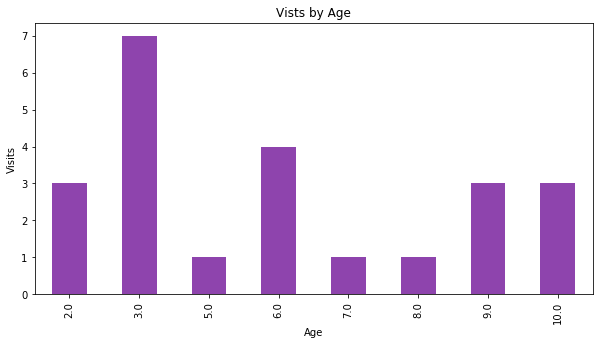

In [12]:
child = hfd[['Age']].copy()
child =child.loc[child['Age']<=12]
child = child.groupby('Age').Age.count()
print child
print "Number of childrens entertained:"+str(sum(child))  #23 child were entertained
g1 = child.plot(kind='bar',figsize=(10, 5),color = '#8E44AD',title="Vists by Age") 
g1.set_xlabel('Age')
g1.set_ylabel('Visits')

# Q5. Which gender type had what kind of procedure in abundance?

In [13]:
#check if Sex column contains garbage values
print"No of NaN values: "+str(sum(hfd.Sex.isnull())) #12 nan values

print"Values of Sex column  are: "+ str(hfd.Sex.unique()) #['F', 'M', nan, 'f', '-'

No of NaN values: 12
Values of Sex column  are: ['F' 'M' nan 'f' '-']


In [14]:
#cleaning Sex column
hfd.Sex = hfd.Sex.replace('-',np.nan) #removing '-' from Sex column
hfd.Sex= map(lambda x: str(x).upper(),hfd.Sex) #conveting 'f' and 'm' to upper case

print "Values of Sex column are: "+str(hfd.Sex.unique())

Values of Sex column are: ['F' 'M' 'NAN']


In [15]:
# Now we calculate procedure of each Sex
gend = hfd[['Sex','Specialty']].copy()
gend['Counts'] =1       #initially, set that counter to 1.
group_data = gend.groupby(['Sex','Specialty'])['Counts'].sum() #sum function
print "Below are the results: "
print group_data

Below are the results: 
Sex  Specialty         
F    Child Specialist       3
     Dental                 1
     Dentist               57
     ENT                    1
     General Surgeon        2
     Gynae                 13
     M/o                    7
     Medical Specialist     1
     Orthopedic             5
     Psychotherapist        4
     Radiologist            3
M    Anaesthetist           1
     Child Specialist       7
     Dentist               46
     Dermatologist          1
     General Surgeon        2
     M/o                    8
     Medical Specialist     2
     Orthopedic             3
     Psychotherapist       10
     Radiologist            3
NAN  Child Specialist       1
Name: Counts, dtype: int64


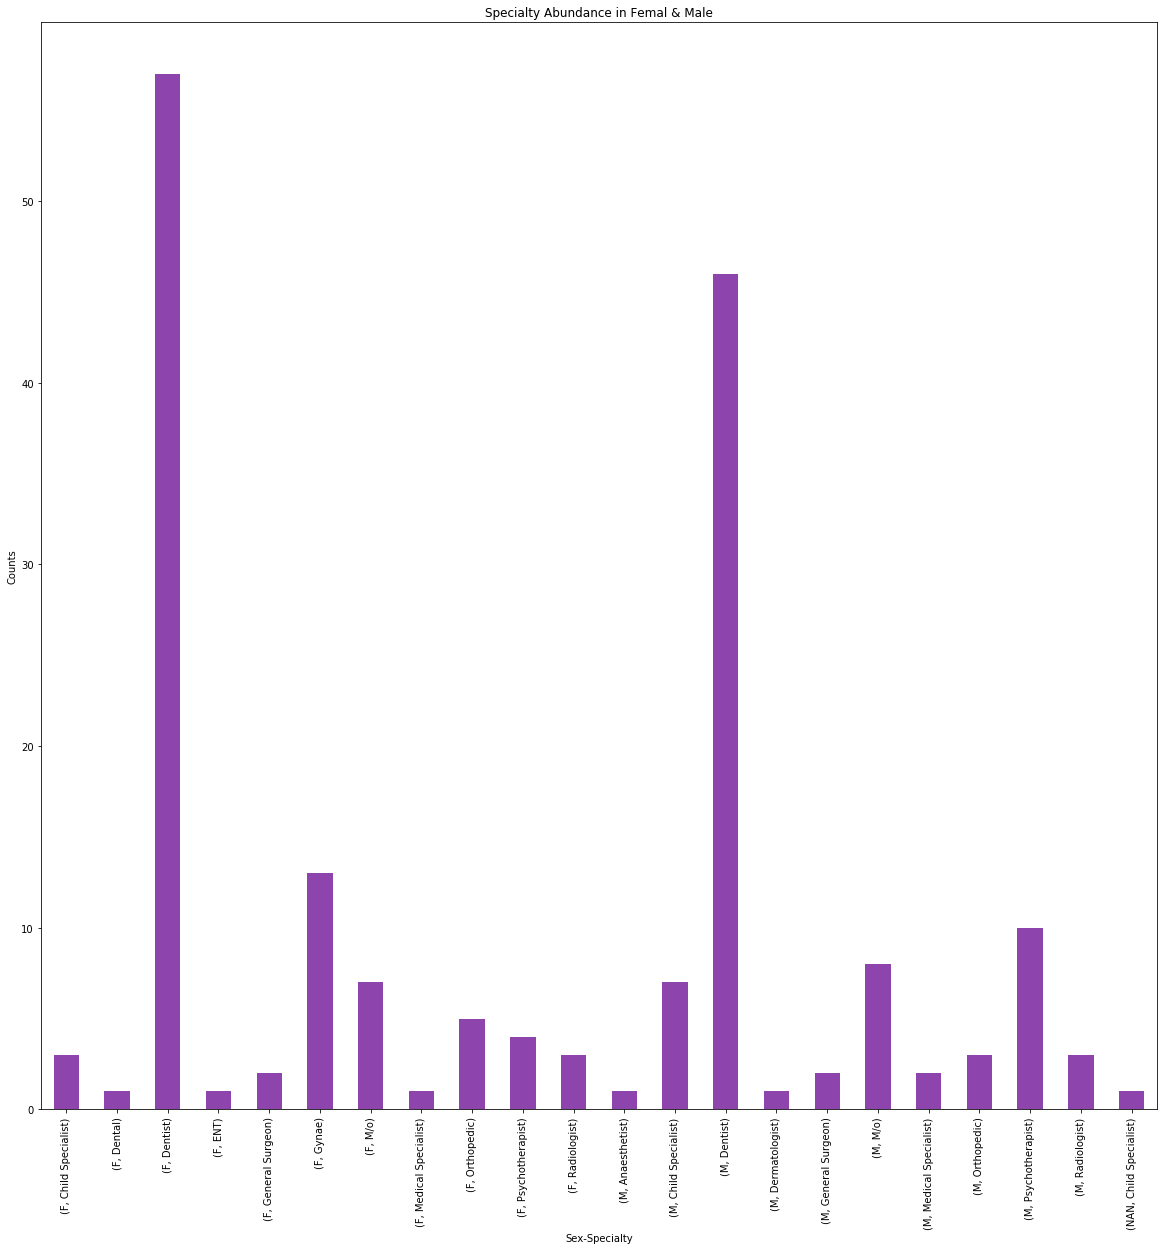

In [16]:
# We can see from above results that Dentist is abundance in both Female and Male

#Lets plot a graph 
g1 = group_data.plot(kind='bar',figsize=(20, 20),color = '#8E44AD',title="Specialty Abundance in Femal & Male") 
g1.set_xlabel('Sex-Specialty')
g1.set_ylabel('Counts')

# Q6. Which Doctor is earning highest?

In [17]:
hfd.columns

Index([u'Date', u'id', u'Time', u'Age', u'Sex', u'ConsultingDoctor',
       u'Specialty', u'Procedure', u'TotalCharges', u'AmountReceived',
       u'AmountBalance', u'AmountReceivedBy', u'AmountinHospital',
       u'ReceptionistName', u'NextApt', u'WeekDay'],
      dtype='object')

In [18]:
#Check how many Nans are in TotalCharges column
print "Number of NaN values: "+str(sum(hfd.TotalCharges.isnull())) #16 Nan values

Number of NaN values: 16


In [19]:
#Check if garbage values in TotalCharges
print "Values in TotalCharges Columns: "+str(hfd.TotalCharges.unique())

#we see only one value is garbage i.e. 'Cancelled'

Values in TotalCharges Columns: ['30000' '1500' '1000' '2000' '35000' '500' 'Cancelled' nan '4000' '5000'
 '6000' '300' '7000' '800' '250' '10000' '3000' '3750' '2600' '5500' '900'
 '2500' '38000' '25500' '1200' '2800' '700' '1150' '1300' '200' '3500'
 '44000' '110000' '15000' '3700' '400' '100' '120000' '600' '50' '4500'
 '8000' '950' '650' '150']


In [20]:
#So we will replace this with NaN

hfd.TotalCharges = hfd.TotalCharges.replace('Cancelled',np.nan)

print "Values in TotalCharges Columns: "+str(hfd.TotalCharges.unique())

Values in TotalCharges Columns: ['30000' '1500' '1000' '2000' '35000' '500' nan '4000' '5000' '6000' '300'
 '7000' '800' '250' '10000' '3000' '3750' '2600' '5500' '900' '2500'
 '38000' '25500' '1200' '2800' '700' '1150' '1300' '200' '3500' '44000'
 '110000' '15000' '3700' '400' '100' '120000' '600' '50' '4500' '8000'
 '950' '650' '150']


In [21]:
#We convert TotalCharges column to numeric
hfd['TotalCharges'] =pd.to_numeric(hfd.TotalCharges,errors='coerce')
#Now we are good to go

docEarn = hfd[['ConsultingDoctor','TotalCharges']].copy()
docEarn = docEarn.groupby('ConsultingDoctor').sum().sort('TotalCharges',ascending=False)

print docEarn

                  TotalCharges
ConsultingDoctor              
Dr Alaf Khan          513050.0
Dr Kinza Alam          76700.0
Dr Saad                52000.0
Dr Ali                 26100.0
Dr Fakiha              22600.0
Dr Qurat ul Ain        20900.0
Dr Riffat Naheed       18800.0
Dr Irfan               11000.0
Nursing Staff           9150.0
Dr Waqar Azeem          6000.0
Dr Saad Riaz            5700.0
Dr Saniya               4000.0
Brig Farrukh            3750.0
Dr Shireen              3200.0
Brig Asif               2800.0
Dr Zubair               1700.0
Dr Paul                 1500.0
Dr Saima Shams          1500.0
Dr Ammara               1500.0
Dr Ammad                1400.0
Dr Mehwish              1000.0
Col Ulfat Ellahi        1000.0
Dr Mumtaz               1000.0


C:\Users\Obaid\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


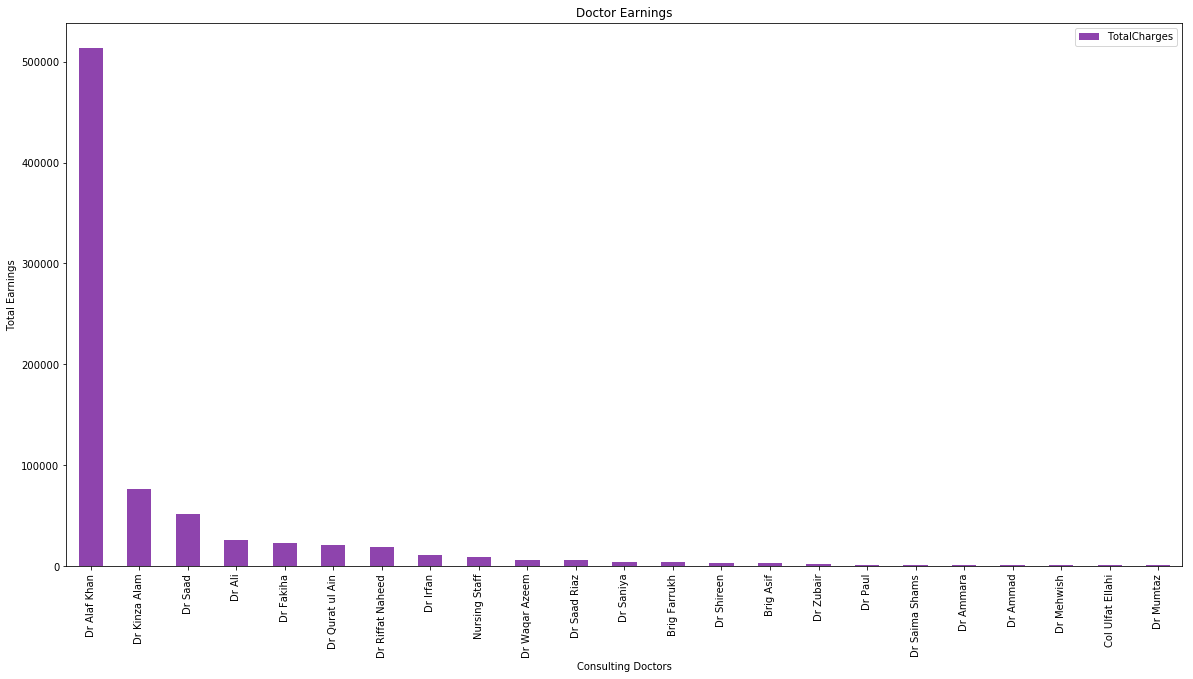

In [22]:
#As we can see, Dr Alaf Khan is on top of the lists in earning
#Now, lets plot that
g1 = docEarn.plot(kind='bar',figsize=(20,10),color='#8E44AD',title="Doctor Earnings")
g1.set_xlabel('Consulting Doctors')
g1.set_ylabel('Total Earnings')

# Q7. Which procedure type earns more money?

In [23]:
procEarn = hfd[['Procedure','TotalCharges']].copy()

procEarn = procEarn.groupby('Procedure').sum().sort('TotalCharges',ascending=False)
procEarn

C:\Users\Obaid\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,TotalCharges
Procedure,
Orthodontics,240000.0
Consultation,83950.0
22 Unit Bridge,69500.0
C Section,65000.0
Operation,50000.0
RCT (4 teeth) Bridge (9 teeth),48000.0
8 Unit Bridge+2 R.C.T,30000.0
Crown,20000.0
Scalling,16500.0


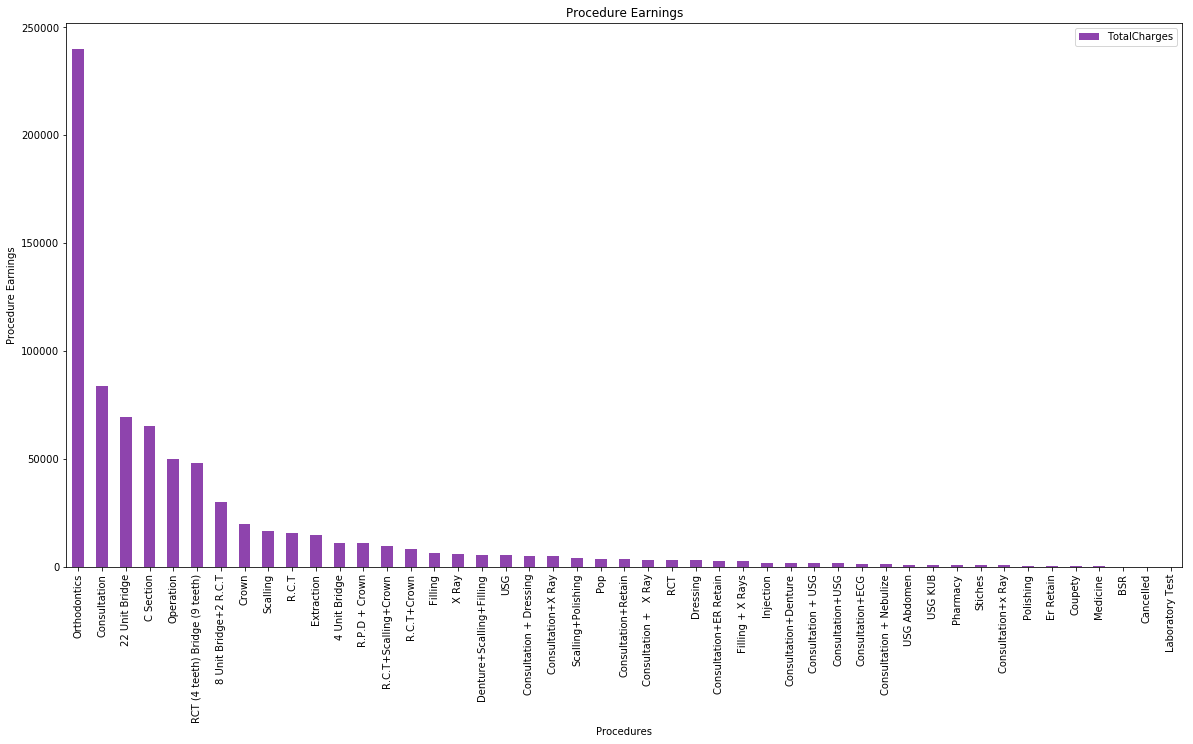

In [24]:
#We see orthodontics has the highest earnings
#lets plot these results
g = procEarn.plot(kind='bar',figsize=(20,10),color='#8E44AD',title='Procedure Earnings')
g.set_xlabel('Procedures')
g.set_ylabel('Procedure Earnings')

# Q8. Which time of the day has highest frequency of visits by hour?

In [25]:
#Checking garbage values in Time Column
hfd.Time.unique()

array(['11:00AM', '10:45AM', '12:38PM', '1:00PM', '2:45PM', '3:00PM',
       '3:28PM', '3:45PM', '5:00PM', '5:30PM', '3:25PM', '6:10PM',
       '11:45PM', '12:40PM', '8:10PM', '8:30PM', '2:00PM', '12:30PM',
       '1:30PM', '-', '8:15PM', nan, '12:36PM', '2:30PM', '3:15PM',
       '5:20PM', '3:50PM', '6:00PM', '4:30PM', '02:00PM', '11:20AM',
       '8:00PM', '6:30PM', '9:00PM', '6:20PM', '11:25AM', '11:15AM',
       '1:10PM', '3:30PM', '6:15PM', '9:40PM', '12:00PM', '10:15AM',
       '1:20PM', '12:15PM', '1:15PM', '4:50PM', '2:10PM', '12:50PM',
       '5:40PM', '6:45PM', '9:45PM', '5:35PM', '6:50PM', '1:40PM',
       '1:25PM', '4:45PM', '4:00PM', '7:30PM', '7:45PM', '2:15PM',
       '10:13AM', '2:40PM', '10:00AM', '9:30AM', '7:00PM', '4:20PM',
       '5:57PM', '7:15PM', '3:40PM', '7:02PM', '11:40AM', '4:10PM',
       '11:30AM', '10:15PM', '7:11PM', '10:10PM', '1:55PM', '1:50PM',
       '9:30PM', '12:20PM', '10:30PM', '7:10PM', '12:48PM', '7:05PM',
       '5:45PM', '7:40PM', '9:35PM', '

In [26]:
# Replaacing '-' with NaN
hfd.Time = hfd.Time.replace('-',np.nan)
hfd.Time.unique()

array(['11:00AM', '10:45AM', '12:38PM', '1:00PM', '2:45PM', '3:00PM',
       '3:28PM', '3:45PM', '5:00PM', '5:30PM', '3:25PM', '6:10PM',
       '11:45PM', '12:40PM', '8:10PM', '8:30PM', '2:00PM', '12:30PM',
       '1:30PM', nan, '8:15PM', '12:36PM', '2:30PM', '3:15PM', '5:20PM',
       '3:50PM', '6:00PM', '4:30PM', '02:00PM', '11:20AM', '8:00PM',
       '6:30PM', '9:00PM', '6:20PM', '11:25AM', '11:15AM', '1:10PM',
       '3:30PM', '6:15PM', '9:40PM', '12:00PM', '10:15AM', '1:20PM',
       '12:15PM', '1:15PM', '4:50PM', '2:10PM', '12:50PM', '5:40PM',
       '6:45PM', '9:45PM', '5:35PM', '6:50PM', '1:40PM', '1:25PM',
       '4:45PM', '4:00PM', '7:30PM', '7:45PM', '2:15PM', '10:13AM',
       '2:40PM', '10:00AM', '9:30AM', '7:00PM', '4:20PM', '5:57PM',
       '7:15PM', '3:40PM', '7:02PM', '11:40AM', '4:10PM', '11:30AM',
       '10:15PM', '7:11PM', '10:10PM', '1:55PM', '1:50PM', '9:30PM',
       '12:20PM', '10:30PM', '7:10PM', '12:48PM', '7:05PM', '5:45PM',
       '7:40PM', '9:35PM', '10:00

In [27]:
# Now we convert Time to standard time

hfd.Time = pd.to_datetime(hfd.Time,format = '%I:%M%p')
hfd['Hour'] =hfd.Time.dt.hour

In [28]:
#Now we groupby Hour
vh = hfd[['Hour']].copy()
vh['Visits']=0
vh = vh.groupby(['Hour']).agg({'Visits':"count"})
vh = vh.sort(['Visits'],ascending=False)
vh

C:\Users\Obaid\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Visits
Hour,
13.0,29
18.0,23
12.0,20
14.0,20
15.0,20
17.0,16
16.0,15
19.0,14
11.0,10


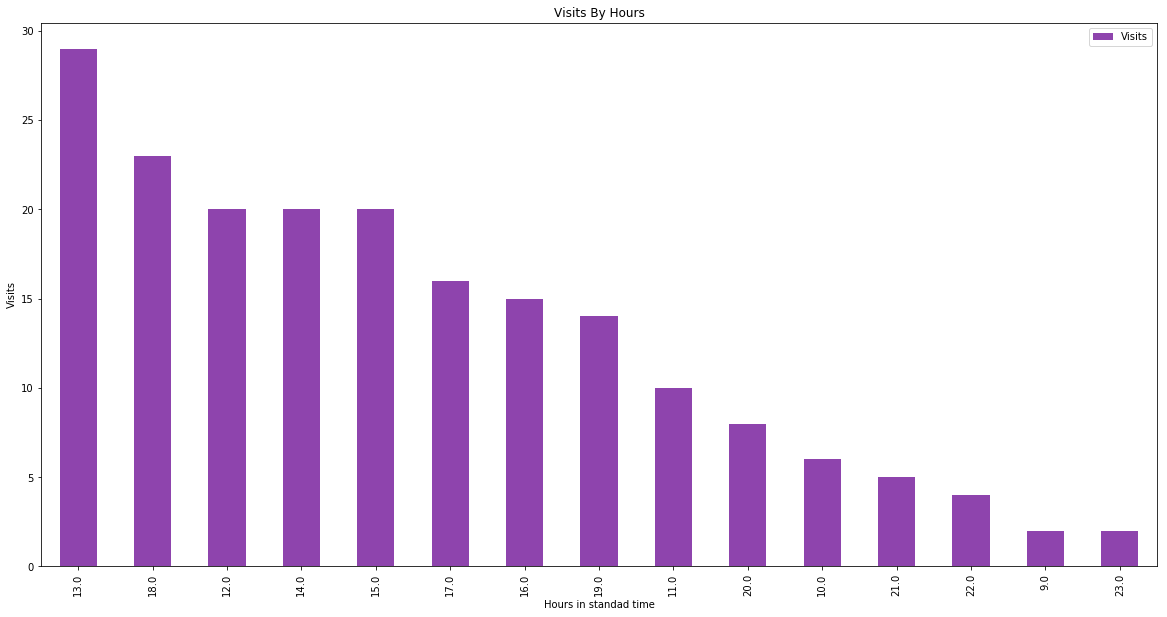

In [29]:
#So we can see, 1:00pm (13:00 Standard Time) 
#lets plot this

g = vh.plot(kind='bar',figsize=(20,10),color='#8E44AD',title='Visits By Hours')
g.set_xlabel('Hours in standad time')
g.set_ylabel('Visits')

# Q9. Create a bracket of time?

In [30]:
#First converting the Hour column to numeric type
hfd['Hour'] = pd.to_numeric(hfd.Hour,errors='coerce')
hfd.Hour

0      11.0
1      10.0
2      12.0
3      13.0
4      14.0
5      15.0
6      15.0
7      15.0
8      15.0
9      17.0
10     17.0
11     17.0
12     13.0
13     15.0
14     18.0
15     23.0
16     12.0
17     20.0
18     20.0
19     12.0
20     14.0
21     14.0
22     12.0
23     13.0
24     13.0
25      NaN
26     20.0
27      NaN
28     12.0
29     13.0
       ... 
192    11.0
193    12.0
194    13.0
195    16.0
196    17.0
197    14.0
198     NaN
199    13.0
200    17.0
201    19.0
202     NaN
203    15.0
204     NaN
205    19.0
206    14.0
207    21.0
208    20.0
209    22.0
210    16.0
211    18.0
212    12.0
213    19.0
214    12.0
215     9.0
216     NaN
217     NaN
218    15.0
219    18.0
220    10.0
221    23.0
Name: Hour, dtype: float64

In [31]:
def getBracket(Hour):
    if Hour >=6.0 and Hour<=12.0:
        return 'Morning'

    elif Hour>=12 and Hour<=16:
        return 'Afternoon'
    elif Hour>=16 and Hour<=19:
        return 'Evening'
    elif ((Hour>=19 and Hour <=23) or (Hour>=0 and Hour<=6)):
        return 'Nigth'
    

In [32]:
#Now creating another column
mask = (hfd.Hour.notnull())
hfd['Bracket'] = hfd[mask].apply(lambda x: getBracket(x['Hour']),axis=1)

hfd[['Time','Hour','Bracket']]

,Time,Hour,Bracket
0,1900-01-01 11:00:00,11.0,Morning
1,1900-01-01 10:45:00,10.0,Morning
2,1900-01-01 12:38:00,12.0,Morning
3,1900-01-01 13:00:00,13.0,Afternoon
4,1900-01-01 14:45:00,14.0,Afternoon
5,1900-01-01 15:00:00,15.0,Afternoon
6,1900-01-01 15:28:00,15.0,Afternoon
7,1900-01-01 15:45:00,15.0,Afternoon
8,1900-01-01 15:45:00,15.0,Afternoon
9,1900-01-01 17:00:00,17.0,Evening


# Q10. How many patients are repeated visitors?

In [33]:
reppat = hfd[['id']].copy()
reppat['Visits']=0
reppat = reppat.groupby(['id']).agg({'Visits':"count"})
reppat = reppat.loc[reppat['Visits']>1]
reppat.shape


(37, 1)

In [34]:
# Results above diisplays that there are 37 patients with more than 1 viisits

# Q11. Give us the id of repeated visitors?

In [35]:
reppat

,Visits
id,
1,12
4,2
12,2
13,2
17,4
20,2
25,2
40,2
45,3


# Q12. Which patients visited again for the same problem?

In [36]:
reppat = hfd[['id','Specialty']].copy()
reppat['Visits']=1
reppat =  reppat.groupby(['id','Specialty']).agg({'Visits':"count"})
reppat = reppat.loc[reppat['Visits']>1]
reppat


,,Visits
id,Specialty,
12,Dentist,2
13,Orthopedic,2
17,Dentist,2
25,Gynae,2
40,Dentist,2
45,Dentist,3
63,Dentist,2
88,Dentist,2
96,Dentist,2


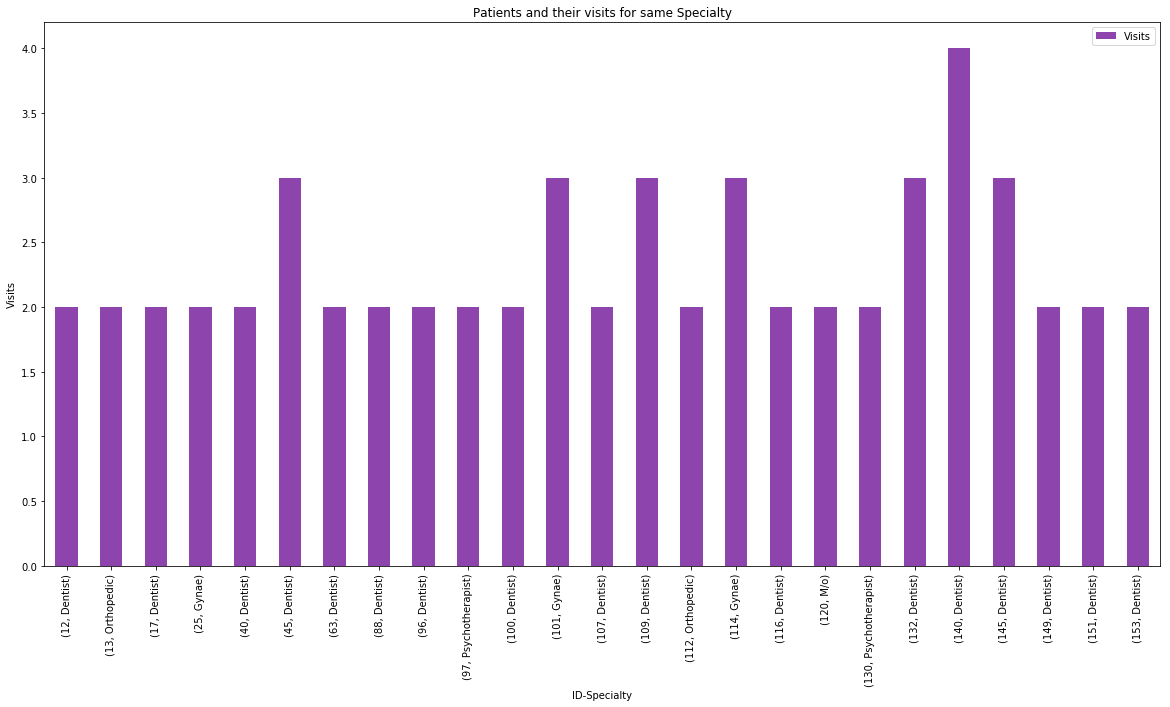

In [37]:
#Lets plot it
g = reppat.plot(kind='bar',figsize=(20,10),color='#8E44AD',title='Patients and their visits for same Specialty')
g.set_xlabel('ID-Specialty')
g.set_ylabel('Visits')

# Q13. What is the median age for Females and Males?

In [38]:
medAge = hfd[['Sex','Age']].copy()
medAge = medAge.groupby(['Sex'])['Age'].apply(np.nanmedian)  #Group sex, and apply median on age
medAge

C:\Users\Obaid\Anaconda2\lib\site-packages\numpy\lib\nanfunctions.py:717: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


Sex
F      30.0
M      29.0
NAN     NaN
Name: Age, dtype: float64

# Q14. What is the total amount in balance?

In [39]:
#Checking if there are garbage values in AmountBalance 
hfd['AmountBalance'].unique()

array([' -   ', nan, '14,000.00', '3,000.00', '90,000.00', '22,000.00',
       '500'], dtype=object)

In [40]:
hfd.AmountBalance = hfd.AmountBalance.replace(',','',regex=True)
hfd.AmountBalance = pd.to_numeric(hfd.AmountBalance,errors='coerce')

amountBalance = hfd.AmountBalance.sum()
amountBalance #222500

222500.0

# Q15. How much money was made by Procedure Type “Consultation”?

In [46]:
hfd.TotalCharges = pd.to_numeric(hfd.TotalCharges,errors='coerce')
consEarn = hfd[['Procedure','TotalCharges']].copy()
consEarn = consEarn.loc[consEarn['Procedure']=='Consultation']
consEarn = consEarn.groupby('Procedure').sum()
consEarn = consEarn.reset_index()
consEarn #83950

,Procedure,TotalCharges
0,Consultation,83950.0
